In [1]:
pip install keras

In [2]:
pip install keras-adamw

In [3]:
pip install TenserFlow

ERROR: Could not find a version that satisfies the requirement TenserFlow (from versions: none)
ERROR: No matching distribution found for TenserFlow


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, KFold

In [5]:
turbine1 = pd.read_csv('gas_turbines.csv')
turbine1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
turbine = turbine1.drop_duplicates()    #cleaning duplicates
turbine.shape

(15039, 11)

In [7]:
turbine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [9]:
turbine.describe()


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


# visualization

In [10]:
sns.pairplot(turbine)

Output hidden; open in https://colab.research.google.com to view.

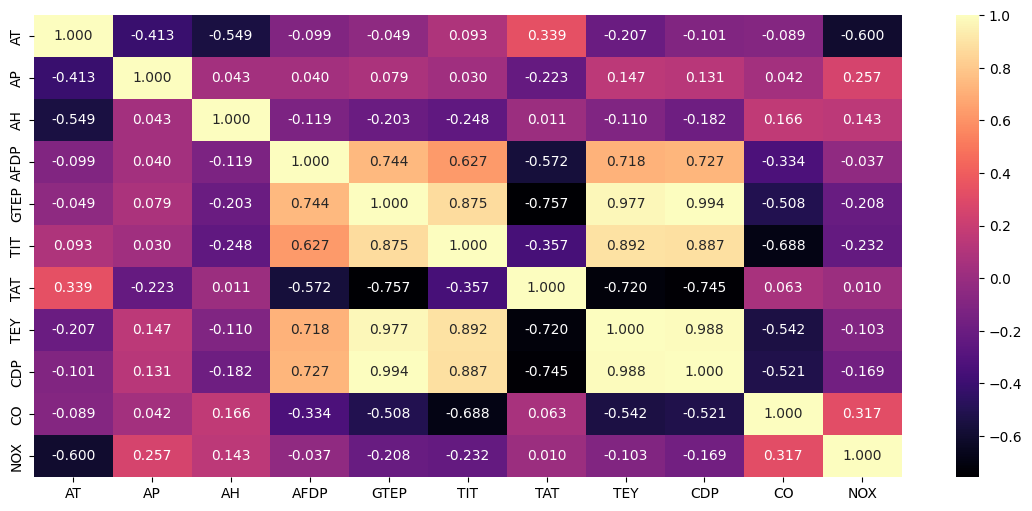

In [11]:
plt.figure(figsize = (14, 6));
sns.heatmap(turbine.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Neural Network :

In [13]:
np.random.seed(8)

# split into input (X) and output (Y) variables
X = turbine.drop(['TEY'],axis=1)
Y = turbine['TEY']
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [15]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# 1. Batch Size and Epochs

In [16]:
# create model
model = Sequential()
model.add(Dense(26, input_dim = 10,  activation='relu')) #1st layer
model.add(Dense(26,  activation='tanh')) #2nd layer
model.add(Dense(26, activation='sigmoid')) #3rd layer
model.add(Dense(26, activation='leaky_relu')) #4th layer or op layer
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_percentage_error'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=10)

Epoch 1/20
1008/1008 [==============================] - 6s 5ms/step - loss: 14912.6016 - mean_absolute_percentage_error: 89.1027 - val_loss: 10971.0244 - val_mean_absolute_percentage_error: 78.2419
Epoch 2/20
1008/1008 [==============================] - 4s 4ms/step - loss: 9280.8428 - mean_absolute_percentage_error: 69.6061 - val_loss: 6566.6797 - val_mean_absolute_percentage_error: 59.7746
Epoch 3/20
1008/1008 [==============================] - 3s 3ms/step - loss: 5468.0166 - mean_absolute_percentage_error: 52.4991 - val_loss: 3585.9580 - val_mean_absolute_percentage_error: 43.1211
Epoch 4/20
1008/1008 [==============================] - 5s 5ms/step - loss: 2925.9575 - mean_absolute_percentage_error: 37.0772 - val_loss: 1715.5859 - val_mean_absolute_percentage_error: 28.2203
Epoch 5/20
1008/1008 [==============================] - 4s 4ms/step - loss: 1386.3011 - mean_absolute_percentage_error: 23.5543 - val_loss: 709.3373 - val_mean_absolute_percentage_error: 15.7389
Epoch 6/20
1008/100

In [17]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 2ms/step - loss: 251.8372 - mean_absolute_percentage_error: 8.8801
mean_absolute_percentage_error: 8.88%


In [18]:
model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [19]:
scores

[251.83718872070312, 8.880119323730469]

In [20]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

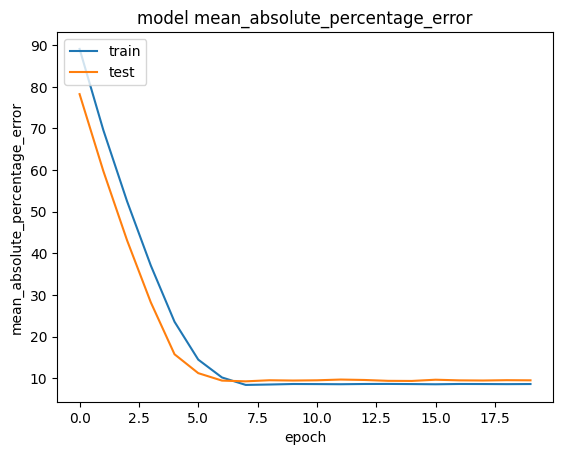

In [21]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

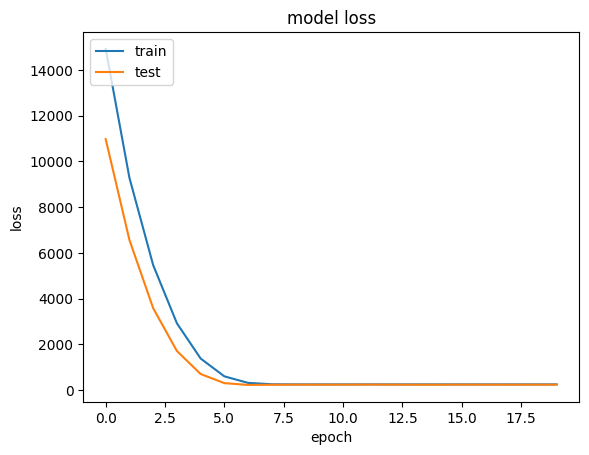

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()